### Prepare(pytorch 0.3.1)

In [215]:
from __future__ import print_function
import torch

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [216]:
torch.cuda.is_available()

False

In [217]:
torch.__version__

'0.3.1.post3'

### Tensor as numpy

In [218]:
x=torch.eye(5,5)
x


 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1
[torch.FloatTensor of size 5x5]

In [219]:
x=torch.randn(10,10)
y=torch.randn(10,10)

In [220]:
x+y == torch.add(x,y);
res = torch.zeros(x.size())
torch.add(x,y,out=res);
res==x+y
res==x.add(y)


    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
[torch.ByteTensor of size 10x10]

In [221]:
#reshape
x.view(2,-1)



Columns 0 to 9 
 0.6614  0.2669  0.0617  0.6213 -0.4519 -0.1661 -1.5228  0.3817 -1.0276 -0.5631
-0.3968 -0.6571 -1.6428  0.9803 -0.0421 -0.8206  0.3133 -1.1352  0.3773 -0.2824

Columns 10 to 19 
-0.8923 -0.0583 -0.1955 -0.9656  0.4224  0.2673 -0.4212 -0.5107 -1.5727 -0.1232
-2.5667 -1.4303  0.5009  0.5438 -0.4057  1.1341 -1.1115  0.3501 -0.7703 -0.1473

Columns 20 to 29 
 3.5870 -1.8313  1.5987 -1.2770  0.3255 -0.4791  1.3790  2.5286  0.4107 -0.9880
 0.6272  1.0935  0.0939  1.2381 -1.3459  0.5119 -0.6933 -0.1668 -0.9999 -1.6476

Columns 30 to 39 
-0.9081  0.5423  0.1103 -2.2590  0.6067 -0.1383  0.8310 -0.2477 -0.8029  0.2366
 0.8098  0.0554  1.1340 -0.5326  0.6592 -1.5964 -0.3769 -3.1020 -0.0995 -0.7213

Columns 40 to 49 
 0.2857  0.6898 -0.6331  0.8795 -0.6842  0.4533  0.2912 -0.8317 -0.5525  0.6355
 1.2708 -0.0020 -1.0952  0.6016  0.6984 -0.8005  1.5381  1.4673  1.5951 -1.5279
[torch.FloatTensor of size 2x50]

### Variable wrap Tensor

In [222]:
### Variable

v_x = autograd.Variable(x,requires_grad=True);
v_y = autograd.Variable(y,requires_grad=True);
v_z = v_x + v_y

v_z.data


 1.6770  0.0650 -1.2248  1.4444 -1.0620 -1.4621 -2.4662  1.0500  0.1352 -0.8859
 0.9859 -0.6249  0.2061 -1.0809  0.7395  0.8302  0.4450 -0.8635 -1.2244  1.0138
 3.2531 -3.3037  2.3283 -1.4082 -0.3113  0.5638  1.8693  3.5604 -0.1882  0.6135
-1.9815 -0.6750  0.7575 -2.3002  0.4292 -0.6383  1.6983 -0.5209 -1.2637  0.1375
 0.7585  1.6948 -0.9202 -0.2824 -0.6566  1.0185  0.2797 -0.1611 -1.0454  2.1405
-2.7232  0.9598 -2.5454  1.1540  0.0351 -1.7545  0.4047  0.2588 -0.3103 -0.7883
-2.3743 -0.7142 -0.3110 -0.9179 -0.1730  1.3236 -1.3319  0.4991 -0.7603 -0.2716
 2.0969  0.6984 -0.4162  2.3544 -1.9385  1.4208 -1.7725 -0.8419  0.4084 -3.4932
 0.2443 -0.8539  0.6449 -1.1501  1.0428 -1.2112  0.4121 -1.9657 -0.2142 -0.7393
 1.3199  0.4252 -1.9948  1.1329  1.1018  0.6516 -0.8800  0.2767  2.2915 -0.3983
[torch.FloatTensor of size 10x10]

In [223]:
grad_f =v_z.grad_fn
grad_f

#### backwards gradient

In [224]:
s = v_z.sum()
# start calculate using bp
s .backward()

In [225]:
# dx 
v_x.grad

Variable containing:
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
[torch.FloatTensor of size 10x10]

In [226]:
# dy
v_y.grad

Variable containing:
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1     1     1
[torch.FloatTensor of size 10x10]

In [31]:
#dz? None
type(v_z.grad)

NoneType

#### Linear map

In [32]:
lin = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
# init by random
print(lin.weight)
print(lin.bias)
#data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = autograd.Variable(torch.randn(2, 5))
print(lin(data))  # yes

Parameter containing:
-0.2280  0.3141  0.0029 -0.3590 -0.0937
-0.4037 -0.2317 -0.3168  0.3059 -0.0940
-0.0773  0.2143  0.1820 -0.2951  0.1648
[torch.FloatTensor of size 3x5]

Parameter containing:
 0.1900
-0.3556
 0.3888
[torch.FloatTensor of size 3]

Variable containing:
 0.6196  0.1353  0.5635
 1.1082 -0.3728  1.1576
[torch.FloatTensor of size 2x3]



In [33]:
b = lin(data);

###  embeddings

padding_idx的意思是，如果原indice为0，则得到的embedding向量也为0

6 表示

In [34]:
#embedding = nn.Embedding(6, 3, padding_idx=0)

100表示总的embedding indice的大小，词典单词的总个数之类的.

In [35]:
embedding = nn.Embedding(100, 30)

输入时，可以按batch_num x indices来输入 , batch_num表示batch_num 个batch, indices表示一个batch的大小
至于RNN里有多少个loop,跟这个embedding一点关系也没有

记住,torch里的nn.Embedding也好，nn.Linear也好,都是定义了一个系数矩阵;
如Linear:
    nn.Linear(10,20) 相当于将输入x的10维度通过linear layer变为20层:
```Y=W*X + b ```

实际输入的X,可以是10x1, 也可以是`10 x batch_num x batch_size`这样的形式.

最后的输出也具有形式`batch_num x batch_size`而已:
```W(20x10) * X(10x1000x10) = Y (20x1000x10)```

In [36]:
np.random.randint(0,12,(100,100))

NameError: name 'np' is not defined

In [ ]:
 inputs = autograd.Variable(torch.LongTensor(np.random.randint(0,12,(100,100))))

In [ ]:
 inputs = autograd.Variable(torch.LongTensor([[1,1,0,0,2,0,5,2,1,1],[10,10,1,1,1,2,3,4,1,2]]))

In [ ]:
embedding(inputs)

### EX0 Liner regression using gradient descent

#### 用torch计算梯度，最底层Gradient descent 

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
lens = 30000
a = 10
b= 3
c = 2

In [40]:
o=np.linspace(-1,1,lens) 
y= a* np.square(o) + b* o + c
x = o+  np.random.randn(lens,)*0.05

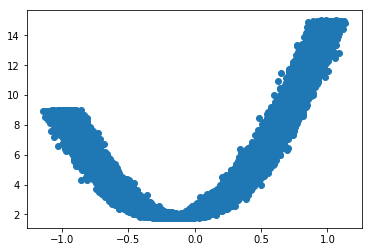

In [41]:
plt.scatter(x,y)

let's predict a,b,c
y = ax^2 + bx +c

In [42]:
X_t=torch.from_numpy(x).type(torch.FloatTensor)
Y_t=torch.from_numpy(y).type(torch.FloatTensor)

In [43]:
type(X_t)

torch.FloatTensor

In [44]:
X=autograd.Variable(X_t)
Y=autograd.Variable(Y_t)

In [45]:
a=autograd.Variable(torch.randn(1),requires_grad=True)
b=autograd.Variable(torch.randn(1),requires_grad=True)
c=autograd.Variable(torch.randn(1),requires_grad=True)

In [46]:
a

Variable containing:
-0.3790
[torch.FloatTensor of size 1]

In [47]:
def linmodel(a,b,c,x): return a*(x**2) + b*x +c

In [48]:
def mse(y_pred,y): return ((y_pred-y)**2).mean()

In [49]:
def mse_loss(a,b,c,x,y): return mse(linmodel(a,b,c,x),y)

In [50]:
lr =0.05
epochs=400
batches = 10

In [51]:
a=autograd.Variable(torch.randn(1),requires_grad=True)
b=autograd.Variable(torch.randn(1),requires_grad=True)
c=autograd.Variable(torch.randn(1),requires_grad=True)
for i in range(epochs):
    
    loss = mse_loss(a,b,c,X,Y)
    if i % 20 ==0: print ('loss ', loss.data[0])
    loss.backward()
    
    a.data   -= lr * a.grad.data
    b.data   -= lr * b.grad.data
    c.data   -= lr * c.grad.data
    
    a.grad.data.zero_();
    b.grad.data.zero_();
    c.grad.data.zero_();

loss  36.55488967895508
loss  4.538230895996094
loss  2.7963781356811523
loss  2.0035440921783447
loss  1.5090769529342651
loss  1.1730295419692993
loss  0.9368081092834473
loss  0.7686601281166077
loss  0.6484246253967285
loss  0.5623102188110352
loss  0.5005981922149658
loss  0.4563653767108917
loss  0.4246579706668854
loss  0.40192911028862
loss  0.3856358528137207
loss  0.37395575642585754
loss  0.36558303236961365
loss  0.359580934047699
loss  0.35527849197387695
loss  0.35219424962997437


#### 用nn.Linear  + optim 

##### Model Prepare

y = a*x^2  + bx +c

In [52]:
class L2Model(nn.Module):
    def __init__(self,n_x):
        super().__init__()
        self.lin = nn.Linear(n_x,1)
    # input should be [ x  x^2] x  batch_size   for each batch
    def forward(self,*X): 
        bs = X[0].size(0)
        #X here is a tuple 
        return self.lin(torch.t(torch.stack((X[0],X[1]))))

In [53]:
lm = L2Model(2)

In [54]:
[p for p in lm.parameters()]

[Parameter containing:
  0.6309 -0.5963
 [torch.FloatTensor of size 1x2], Parameter containing:
  0.2659
 [torch.FloatTensor of size 1]]

model需要什么样的输入?Variable!

In [55]:
X

Variable containing:
-1.0038e+00
-9.8713e-01
-9.8563e-01
     ⋮     
 9.8686e-01
 9.5338e-01
 1.0648e+00
[torch.FloatTensor of size 30000]

In [56]:
X_stack = torch.stack((X,X**2))
X_stack = torch.t(X_stack)
X_stack

Variable containing:
-1.0038e+00  1.0076e+00
-9.8713e-01  9.7443e-01
-9.8563e-01  9.7146e-01
           ⋮            
 9.8686e-01  9.7390e-01
 9.5338e-01  9.0893e-01
 1.0648e+00  1.1337e+00
[torch.FloatTensor of size 30000x2]

In [67]:
Y_pred = lm(X,X**2)
Y_pred
# full-batch

Variable containing:
-9.6821e-01
-9.3793e-01
-9.3521e-01
     ⋮      
 3.0778e-01
 3.2539e-01
 2.6163e-01
[torch.FloatTensor of size 30000x1]

用optim 来梯度下降, lm算前向，backward bp算法

##### full-batch

In [80]:
lm = L2Model(2)
optimizer = optim.SGD(lm.parameters(), lr=0.3)


for e in range(epochs):
    Y_pred = lm(X,X**2)
    loss = F.mse_loss(Y_pred,Y)
    if e % 50 ==0: print('mse loss: ',loss.data[0])
    loss.backward()
    optimizer.step()
    lm.zero_grad()

[p for p in lm.parameters()]

mse loss:  47.060848236083984
mse loss:  0.37773704528808594
mse loss:  0.3445877730846405
mse loss:  0.3443857431411743
mse loss:  0.3443855047225952
mse loss:  0.3443852663040161
mse loss:  0.3443852961063385
mse loss:  0.3443852961063385


[Parameter containing:
  2.9648  9.5871
 [torch.FloatTensor of size 1x2], Parameter containing:
  2.1049
 [torch.FloatTensor of size 1]]

##### mini-batch

In [88]:
bs=512
range(lens // bs)

range(0, 58)

In [106]:
bs = 512
left = lens - bs* (lens//bs)
left

304

In [129]:
a=[1,2,3,4,5,6,7,8,9,10]
left =2

In [132]:
a[10-left:]

[9, 10]

In [201]:
bs = 512
# 把数据分成batches.
X2=X**2
bs_data = [ (X[j*bs:(j+1)*bs],X2[j*bs:(j+1)*bs],Y[j*bs:(j+1)*bs]) for j in range(lens // bs) ]
# 剩余不足512整数倍的数据 需要再添加一个batch
left = lens - bs* (lens//bs)
bs_data.append(
    (
        X[lens-left:],
        X2[lens-left:],
        Y[lens-left:]
        
    )
)

In [202]:
def proc(data):
    X0=data[0]
    X1=data[1]
    Y=data[2]        
    Y_pred = lm(X0,X1)
    loss = F.mse_loss(Y_pred,Y)
    
    loss.backward()
    optimizer.step()
    lm.zero_grad()
    return loss
    

In [209]:
lm = L2Model(2)

optimizer = optim.SGD(lm.parameters(), lr=0.02)

eps = 40

for e in range(eps):
    for i,data in enumerate(bs_data):
        loss = proc(data)
        if (e % 5 == 0 ) and (i % 20 == 0): print('epochs: ',e,'batchs: ',i,'mse_loss: ',loss.data[0])
    

[p for p in lm.parameters()]

epochs:  0 batchs:  0 mse_loss:  91.04118347167969
epochs:  0 batchs:  20 mse_loss:  0.016344910487532616
epochs:  0 batchs:  40 mse_loss:  6.791793346405029
epochs:  5 batchs:  0 mse_loss:  10.354704856872559
epochs:  5 batchs:  20 mse_loss:  1.0935184955596924
epochs:  5 batchs:  40 mse_loss:  0.45009323954582214
epochs:  10 batchs:  0 mse_loss:  2.6887059211730957
epochs:  10 batchs:  20 mse_loss:  0.21073123812675476
epochs:  10 batchs:  40 mse_loss:  0.30528363585472107
epochs:  15 batchs:  0 mse_loss:  1.1499251127243042
epochs:  15 batchs:  20 mse_loss:  0.07216770201921463
epochs:  15 batchs:  40 mse_loss:  0.28250324726104736
epochs:  20 batchs:  0 mse_loss:  0.8714697957038879
epochs:  20 batchs:  20 mse_loss:  0.04497392848134041
epochs:  20 batchs:  40 mse_loss:  0.2813211977481842
epochs:  25 batchs:  0 mse_loss:  0.8082141876220703
epochs:  25 batchs:  20 mse_loss:  0.038116034120321274
epochs:  25 batchs:  40 mse_loss:  0.2818431258201599
epochs:  30 batchs:  0 mse_loss:

[Parameter containing:
  3.0556  9.5580
 [torch.FloatTensor of size 1x2], Parameter containing:
  2.1228
 [torch.FloatTensor of size 1]]

##### 换一个optim试试

In [214]:
lm = L2Model(2)

optimizer = optim.Adam(lm.parameters(),lr=0.01)

eps = 100

for e in range(eps):
    for i,data in enumerate(bs_data):
        loss = proc(data)
        if (e % 5 == 0 ) and (i % 20 == 0): print('epochs: ',e,'batchs: ',i,'mse_loss: ',loss.data[0])
    

[p for p in lm.parameters()]

epochs:  0 batchs:  0 mse_loss:  77.9782943725586
epochs:  0 batchs:  20 mse_loss:  1.4364030361175537
epochs:  0 batchs:  40 mse_loss:  14.293922424316406
epochs:  5 batchs:  0 mse_loss:  33.50813293457031
epochs:  5 batchs:  20 mse_loss:  0.5396761298179626
epochs:  5 batchs:  40 mse_loss:  1.8727866411209106
epochs:  10 batchs:  0 mse_loss:  17.312225341796875
epochs:  10 batchs:  20 mse_loss:  2.8354110717773438
epochs:  10 batchs:  40 mse_loss:  0.029867982491850853
epochs:  15 batchs:  0 mse_loss:  11.520794868469238
epochs:  15 batchs:  20 mse_loss:  3.9585063457489014
epochs:  15 batchs:  40 mse_loss:  0.5469508171081543
epochs:  20 batchs:  0 mse_loss:  9.417847633361816
epochs:  20 batchs:  20 mse_loss:  3.772393226623535
epochs:  20 batchs:  40 mse_loss:  1.0282247066497803
epochs:  25 batchs:  0 mse_loss:  8.335884094238281
epochs:  25 batchs:  20 mse_loss:  3.0648369789123535
epochs:  25 batchs:  40 mse_loss:  1.177186131477356
epochs:  30 batchs:  0 mse_loss:  7.317866325

[Parameter containing:
  2.9919  9.6088
 [torch.FloatTensor of size 1x2], Parameter containing:
  2.0824
 [torch.FloatTensor of size 1]]

### Ex 1 : Bag of Words using logSoftmax ex

用pytorch解决一个多分类的经典问题

model ---> forward计算

lossfunciton 反向bp ,更新参数 ,
loss.backword()
optim.step()

再用 model预测新样本 

In [25]:
data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea is".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]

# word_to_ix maps each word in the vocab to a unique integer, which will be its
# index into the Bag of words vector
word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2
class BoWClassifier(nn.Module):  # inheriting from nn.Module!

    def __init__(self, num_labels, vocab_size):
        # calls the init function of nn.Module.  Dont get confused by syntax,
        # just always do it in an nn.Module
        super(BoWClassifier, self).__init__()

        # Define the parameters that you will need.  In this case, we need A and b,
        # the parameters of the affine mapping.
        # Torch defines nn.Linear(), which provides the affine map.
        # Make sure you understand why the input dimension is vocab_size
        # and the output is num_labels!
        self.linear = nn.Linear(vocab_size, num_labels)

        # NOTE! The non-linearity log softmax does not have parameters! So we don't need
        # to worry about that here

    def forward(self, bow_vec):
        # Pass the input through the linear layer,
        # then pass that through log_softmax.
        # Many non-linearities and other functions are in torch.nn.functional
        return F.log_softmax(self.linear(bow_vec), dim=1)


def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


# 'SPAINIS' 'ENGLISH''SPAINIS' 'ENGLISH''SPAINIS' 'ENGLISH'--->'0,1,0,1'
def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])


model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

# the model knows its parameters.  The first output below is A, the second is b.
# Whenever you assign a component to a class variable in the __init__ function
# of a module, which was done with the line
# self.linear = nn.Linear(...)
# Then through some Python magic from the Pytorch devs, your module
# (in this case, BoWClassifier) will store knowledge of the nn.Linear's parameters
for param in model.parameters():
    print(param)

# To run the model, pass in a BoW vector, but wrapped in an autograd.Variable
sample = data[0]
bow_vector = make_bow_vector(sample[0], word_to_ix)
print('bow_vec',bow_vector)
log_probs = model(autograd.Variable(bow_vector))
print(log_probs)

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}
Parameter containing:

Columns 0 to 9 
 0.0475 -0.1450  0.1674 -0.0761  0.1181  0.0058 -0.0153 -0.0063  0.0333  0.0924
-0.0449  0.1427  0.1553  0.1855 -0.0398 -0.1524  0.1931 -0.0418 -0.0807  0.0478

Columns 10 to 19 
 0.0315  0.0598 -0.1764  0.1429  0.1710  0.1621  0.1450 -0.1415 -0.0727  0.1729
-0.1371  0.1289  0.1229 -0.1556 -0.1611 -0.0172  0.0824 -0.0057 -0.0994  0.0045

Columns 20 to 25 
-0.1494  0.1779 -0.1542 -0.1381  0.0959 -0.1409
-0.1843 -0.1386 -0.1306  0.1615  0.1729 -0.0666
[torch.FloatTensor of size 2x26]

Parameter containing:
1.00000e-02 *
  0.8796
  8.7463
[torch.FloatTensor of size 2]

bow_vec 

Columns 0 to 12 
    1     1     1     1     1     1     0     0     0     0     0     0     0

C

In [79]:
label_to_ix = {"SPANISH": 0, "ENGLISH": 1}

In [87]:
# Run on test data before we train, just to see a before-and-after
for instance, label in test_data:
    # 相当于特征化一个样本 
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    #模型跑一次，like predict
    log_probs = model(bow_vec)
    print(log_probs)

# Print the matrix column corresponding to "creo"
print(next(model.parameters())[:, word_to_ix["creo"]])

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Usually you want to pass over the training data several times.
# 100 is much bigger than on a real data set, but real datasets have more than
# two instances.  Usually, somewhere between 5 and 30 epochs is reasonable.
for epoch in range(100):
    for instance, label in data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Make our BOW vector and also we must wrap the target in a
        # Variable as an integer. For example, if the target is SPANISH, then
        # we wrap the integer 0. The loss function then knows that the 0th
        # element of the log probabilities is the log probability
        # corresponding to SPANISH
        bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
        target = autograd.Variable(make_target(label, label_to_ix))

        # Step 3. Run our forward pass.
        log_probs = model(bow_vec)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()

for instance, label in test_data:
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    print('for instance', instance)
    probs = torch.exp(log_probs)
    print('instance log_prob:\n',log_probs)
    print('instance prob:\n',probs)

# Index corresponding to Spanish goes up, English goes down!
print(next(model.parameters())[:, word_to_ix["creo"]])


Variable containing:
-0.0731 -2.6527
[torch.FloatTensor of size 1x2]

Variable containing:
-3.5073 -0.0304
[torch.FloatTensor of size 1x2]

Variable containing:
 0.6999
-0.6981
[torch.FloatTensor of size 2]

for instance ['Yo', 'creo', 'que', 'si']
instance log_prob:
 Variable containing:
-0.0657 -2.7551
[torch.FloatTensor of size 1x2]

instance prob:
 Variable containing:
 0.9364  0.0636
[torch.FloatTensor of size 1x2]

for instance ['it', 'is', 'lost', 'on', 'me']
instance log_prob:
 Variable containing:
-3.6621 -0.0260
[torch.FloatTensor of size 1x2]

instance prob:
 Variable containing:
 0.0257  0.9743
[torch.FloatTensor of size 1x2]

Variable containing:
 0.7252
-0.7234
[torch.FloatTensor of size 2]



#### 得到的参数后的解释

对于`creo`这个词:

Variable containing:
 0.7252
-0.7234
[torch.FloatTensor of size 2]

0.72的权重偏向Spanish -0.72权重偏向English 这就是物理意义

### Ex 2 :LeNet For Image Classification ex

### Ex3 : Fastai movilen lesson 5

In [5]:
a = torch.Tensor( [ [2,3],[1,4] ])
b= torch.Tensor([ [3,2],[4,1] ])
a*b


 6  6
 4  4
[torch.FloatTensor of size 2x2]

In [6]:
class dotMultipy(nn.Module):
    def forward(self,a,b): return  sum(a*b)
    
model = dotMultipy()
model(a,b)


 10
 10
[torch.FloatTensor of size 2]

### House price prediction